In [1]:
import datetime
import numpy as np
from qopt.examples.ff_benchmarking.singlet_triplet_setup import \
    create_simulators, create_optimizer, EPS_MIN, N_TIME_STEPS
from qopt.analyser import Analyser
from qopt.data_container import DataContainer

In [9]:
n_runs = 2

np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(N_TIME_STEPS, n_runs)

path = r'Z:\SimulationData\ff_derivative\lindblad_vs_ff'

In [ ]:
simulator_ff, simulator_l, simulator_syst, sim_ff_only = create_simulators()

syst_opt = create_optimizer(simulator_syst)
l_opt = create_optimizer(simulator_l, max_iterations=300)
ff_opt = create_optimizer(simulator_ff, max_iterations=300)
ff_only_opt = create_optimizer(sim_ff_only)

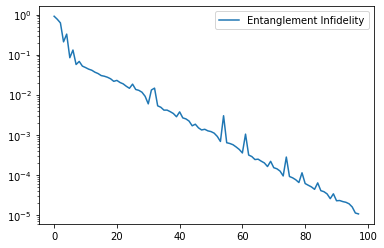

In [3]:
l_data = DataContainer(storage_path=path)
for i in range(n_runs):
    l_result =  l_opt.run_optimization(
        initial_control_amplitudes=initial_conditions[:, i])

    l_data.append_optim_result(l_result)

l_analyser = Analyser(data=l_data)
l_file = r'lindblad' + str(datetime.datetime.now())[:-7]
l_data.to_pickle(filename=l_file)

In [ ]:
ff_data = DataContainer(storage_path=path)
for i in range(n_runs):
    ff_result =  l_opt.run_optimization(
        initial_control_amplitudes=initial_conditions[:, i])

    ff_data.append_optim_result(ff_result)

ff_analyser = Analyser(data=ff_data)
ff_file = r'filter_functions' + str(datetime.datetime.now())[:-7]
ff_data.to_pickle(filename=ff_file)



### Debugging



In [ ]:
np.random.seed(0)

initial_conditions = EPS_MIN * np.random.rand(10, 1)

data = DataContainer()
result = syst_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()


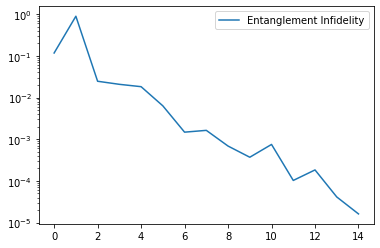

In [5]:
np.random.seed(0)

initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = l_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

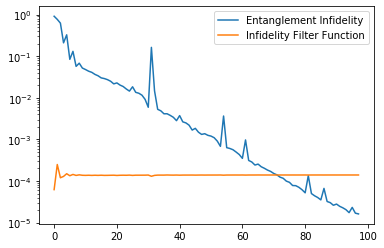

In [10]:
np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = ff_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

In [ ]:
np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = ff_only_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

In [ ]:
preoptimized = result.final_parameters